In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a Linear Regression object
linreg = LinearRegression()


# marketingdata = pd.read_csv('marketing_campaign.csv')
marketingdata = pd.read_csv('marketing_campaign.csv', sep='\t', lineterminator='\n')

In [17]:
marketingdata.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response\r
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [31]:
marketingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [32]:
income = pd.DataFrame(marketingdata['Income'])
income['Income'] = income['Income'].fillna(0)
mthwine = pd.DataFrame(marketingdata['MntWines'])

<AxesSubplot:>

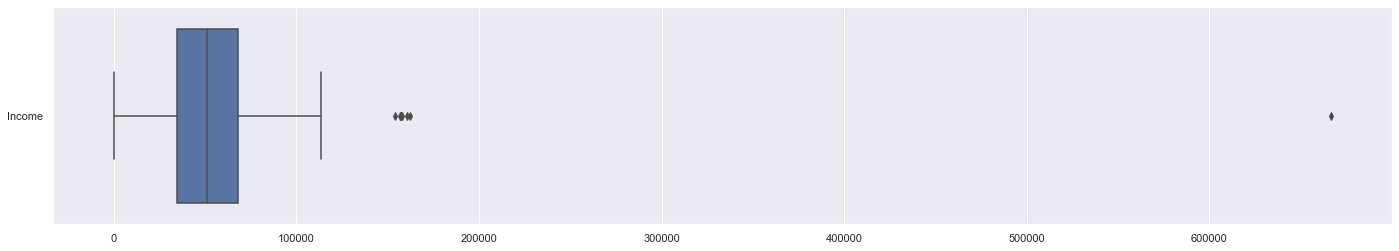

In [33]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = income, orient = "h")

In [34]:
def linearRegression(dataframe1, dataframe2):
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(dataframe1, dataframe2, test_size = 0.25)

    # Linear Regression using Train Data
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()

    # Predict Total values corresponding to HP
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()

    # Plot the Linear Regression line
    f = plt.figure(figsize=(16, 8))
    plt.scatter(X_train, y_train)
    regline_x = X_train
    regline_y = linreg.intercept_ + linreg.coef_ * X_train
    plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
    plt.show()
    return mean_squared_error(y_test, y_test_pred)

Intercept of Regression 	: b =  [-50.2189608]
Coefficients of Regression 	: a =  [[0.00677228]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.2920528568551821
Mean Squared Error (MSE) 	: 79702.99830632322

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.41135619654483635
Mean Squared Error (MSE) 	: 67732.02357306475



InvalidIndexError: (slice(None, None, None), None)

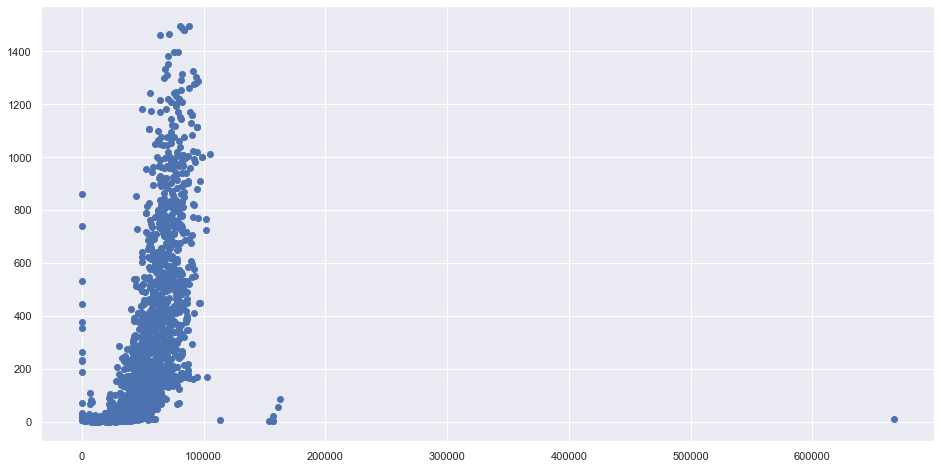

In [35]:
linearRegression(income, mthwine)